# Introduction

This project will take data from the **Pink Cab** company and **Yellow Cab** Company to decide which is better to invest in.

**Questions to Answer**
- Which company has a higher profit?
- Which company has a higher profit margin?
- Which company provides more rides each year?
- Which company has more unique customers?
- Which month do most rides occur per company?
- Which month creates the most profit per company?

Answering these questions will help use to decide which company to invest in.

## Load Data

The first thing done is to import needed libraries to analyse the data. Next the csv files are put into pandas databases.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cab_db = pd.read_csv('Cab_Data.csv')
city_db = pd.read_csv('City.csv')
customer_db = pd.read_csv('Customer_ID.csv')
transaction_db = pd.read_csv('Transaction_ID.csv')


## Data Observation

After the databases are made, I looked at each one to identify their data, and if they can be merged.

First we look at the `cab_db`. We see that it has the following columns:

- **Transaction ID**: A unique ID for each ride.
- **Date of Travel**: The date of the ride.
- **Company**: The name of the cab company.
- **City**: The city where the ride took place.
- **KM Traveled**: The length of the ride.
- **Price Charged**: The ammount charged to the customer.
- **Cost of Trip**: The cost of the trip for the company.

In [3]:
cab_db.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


`city_db` contains the following columns:

- **City**: Name of the city.
- **Population**: Population of the city.
- **Users**: Number of customers in the city.

In [4]:
city_db.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


`customer_db` contains the following columns:

- **Customer ID**: Unique ID for each customer.
- **Gender**: Gender of the customer.
- **Age**: Age of the customer.
- **Income (USD/Month)**: Amount each customer makes in a month in USD.

In [5]:
customer_db.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


`transaction_db` contains the following columns:

- **Transaction ID**: A unique ID for each ride.
- **Customer ID**: A unique ID for each customer.
- **Payment_Mode**: Payment method for the transaction.

In [6]:
transaction_db.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## Merge Data

In order to simplify our databases, they need to be merged.

First the `cab_db` will be merged with the `transaction_db` into a database called `cab_tran`. Since the `cab_db` contains a record of each transaction, we will do a left merge based on it.

In [7]:
cab_tran = pd.merge(cab_db, transaction_db, how='left', on='Transaction ID')
cab_tran.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318,Cash
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788,Card
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106,Card
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799,Cash
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982,Cash


Next we will merge `cab_tran` with `customer_db`.

After this we use `.describe()` and `.info()` to check for null values or place holders

In [8]:
cab_merged = pd.merge(cab_tran, customer_db, how='left', on='Customer ID')
cab_merged.head(10)
print(cab_merged.describe())
print(cab_merged.info())

       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip    Customer ID            Age  Income (USD/Month)  
count  359392.000000  359392.000000  359392.000000       359392.000000  
mean      286.190113   19191.652115      35.336705        15048.822937  
std       157.993661   21012.412463      12.594234         7969.409482  
min        19.000000       1.000000      18.000000         2000.0000

There does not seem to be any null values or place holders, but the **Date of Travel** column is in the wrong format. We import `datetime` to change it into a more standard format. Since we will be using **year** and **month** info in our analysis, we create columns for them as well.

In [9]:
from datetime import date, timedelta, datetime

cab_merged['Year'] = cab_merged['Date of Travel'].apply(lambda x: (date(1900, 1, 1) + timedelta(x)).strftime("%Y"))
cab_merged['Month'] = cab_merged['Date of Travel'].apply(lambda x: (date(1900, 1, 1) + timedelta(x)).strftime("%m"))

cab_merged['Date of Travel'] = cab_merged['Date of Travel'].apply(lambda x: (date(1900, 1, 1) + timedelta(x)).strftime("%Y-%m-%d"))

col1 = cab_merged['Year']
col2 =cab_merged['Month']
cab_merged.drop(labels=['Year', 'Month'], axis=1, inplace = True)
cab_merged.insert(2, 'Year', col1)
cab_merged.insert(3, 'Month', col2)


We will also be looking at profit for our analysis, so a **Profit** column is created by subtracting the **Cost of Trip** from the **Price Charged**.

In [10]:
profit = cab_merged['Price Charged'] - cab_merged['Cost of Trip']

cab_merged.insert(7, 'Profit', profit)

cab_merged.head()
cab_merged['Date of Travel'].max()

'2019-01-02'

One final thing done to organize the data was to create a database for transactions from **Yellow Cab** and **Pink Cab**. A standard color to represent **Pink Cab** in the visuals is also created.

In [11]:
pink = cab_merged[cab_merged.Company == 'Pink Cab']
yellow = cab_merged[cab_merged.Company == 'Yellow Cab']

pink_c = '#9000a6'

## Data Analysis

Now we begin the process of answering our questions.

### Profits

First we look into which company has a higher profit. In order to prep the data, a variable was made to represent the **profit per year** and **profit percentage per year** for each company.

This iformation was put into both a table, and line graphs for each topic as shown below.

In [22]:
import plotly.graph_objects as go

pink_2016 = round(pink[pink.Year == '2016'].Profit.sum(), 2)
pink_2016_per = round((pink_2016 / 
                       (pink[pink.Year == '2016']['Price Charged'].sum()) * 100), 2)
pink_2017 = round(pink[pink.Year == '2017'].Profit.sum(), 2)
pink_2017_per = round((pink_2016 / 
                       (pink[pink.Year == '2017']['Price Charged'].sum()) * 100), 2)
pink_2018 = round(pink[pink.Year == '2018'].Profit.sum(), 2)
pink_2018_per = round((pink_2016 / 
                       (pink[pink.Year == '2018']['Price Charged'].sum()) * 100), 2)
pink_avg = round(((pink_2016 + pink_2017 + pink_2018) / 3), 2)
pink_per_avg = round(((pink_2016_per + pink_2017_per+ pink_2018_per)/ 3), 2)

yellow_2016 = round(yellow[yellow.Year == '2016'].Profit.sum(), 2)
yellow_2016_per = round((yellow_2016 / (yellow[yellow.Year == '2016']['Price Charged'].sum()) * 100), 2)
yellow_2017 = round(yellow[yellow.Year == '2017'].Profit.sum(), 2)
yellow_2017_per = round((yellow_2017 / (yellow[yellow.Year == '2017']['Price Charged'].sum()) * 100), 2)
yellow_2018 = round(yellow[yellow.Year == '2018'].Profit.sum(), 2)
yellow_2018_per = round((yellow_2018 / (yellow[yellow.Year == '2018']['Price Charged'].sum()) * 100), 2)
yellow_avg = round(((yellow_2016 + yellow_2017 + yellow_2018) / 3), 2)
yellow_per_avg = round(((yellow_2016_per + yellow_2017_per + yellow_2018_per)/ 3), 2)


fig = go.Figure(data=[go.Table(header=dict(values=['Company', '2016 Profit', '2016 Profit Margin', 
                                                   '2017 Profit', '2017 Profit Margin', '2018 Profit',
                                                   '2018 Profit Margin', 'Average Profit', 'Average Profit Margin']),
                 cells=dict( values=[['Pink Cab', 'Yellow Cab'], 
                                    [pink_2016, yellow_2016],
                                    [pink_2016_per, yellow_2016_per],
                                    [pink_2017, yellow_2017],
                                    [pink_2017_per, yellow_2017_per], 
                                    [pink_2018, yellow_2018],
                                    [pink_2018_per, yellow_2018_per],
                                    [pink_avg, yellow_avg],
                                    [pink_per_avg, yellow_per_avg]]))])
fig.show()

As you can see, **Yellow Cab** has a higher **Average Profit** ($14,661,003.83) and **Average Profit Margin** (34.99%).

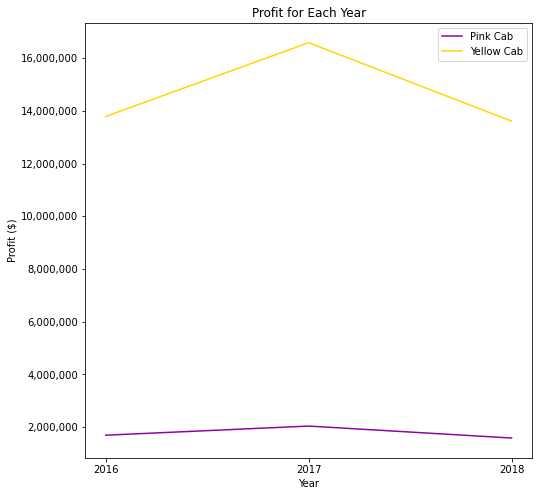

<Figure size 432x288 with 0 Axes>

In [13]:
pink_profit = [pink_2016, pink_2017, pink_2018]
yellow_profit = [yellow_2016, yellow_2017, yellow_2018]
years = [2016, 2017, 2018]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
plt.plot(years, pink_profit, color=pink_c, label='Pink Cab')
plt.plot(years, yellow_profit, color='gold', label = 'Yellow Cab')
ax.set_xticks(years)
ax.ticklabel_format(style='plain')
plt.title('Profit for Each Year')
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.legend()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()
plt.clf()

The above graphs highlights that both companies had more **profits** in 2017 while have less in 2018.

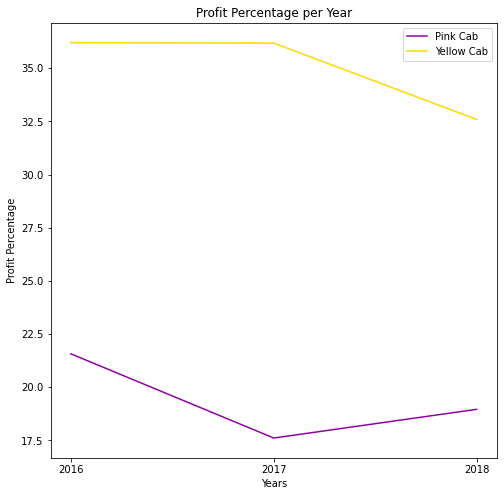

In [14]:
pink_per_list = [pink_2016_per, pink_2017_per, pink_2018_per]
yellow_per_list = [yellow_2016_per, yellow_2017_per, yellow_2018_per]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
plt.plot(years, pink_per_list, color=pink_c, label='Pink Cab')
plt.plot(years, yellow_per_list, color='gold', label='Yellow Cab')
plt.title('Profit Margin per Year')
plt.legend()
plt.ylabel('Profit Margin')
plt.xlabel('Years')
ax.set_xticks(years)

plt.show()

This graph highlights some differences between the two companies.

**Yellow Cab**
- Very similar **profit margin** in 2016 and 2017
- Drop in **profit margin** in 2018
- While **profit** was UP from 2017 to 2018, the **profit margin** went down

**Pink Cab**
- Drop in **profit margin** from 2016 to 2017 
- Rise in **profit margin** in 2018
- While **profit** dropped 2018, **profit margin** increased 

### Ride Numbers

Next we look into the number or rides per year. This is done by counting the number of `Transaction ID`s that appear in each year.

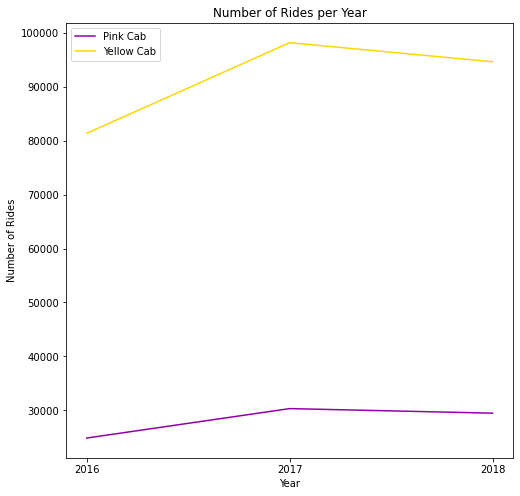

<Figure size 432x288 with 0 Axes>

In [15]:
yellow_rides_2016 = yellow[yellow.Year == '2016']['Transaction ID'].count()
yellow_rides_2017 = yellow[yellow.Year == '2017']['Transaction ID'].count()
yellow_rides_2018 = yellow[yellow.Year == '2018']['Transaction ID'].count()
yellow_rides_full = [yellow_rides_2016, yellow_rides_2017, yellow_rides_2018]

pink_rides_2016 = pink[pink.Year == '2016']['Transaction ID'].count()
pink_rides_2017 = pink[pink.Year == '2017']['Transaction ID'].count()
pink_rides_2018 = pink[pink.Year == '2018']['Transaction ID'].count()
pink_rides_full = [pink_rides_2016, pink_rides_2017, pink_rides_2018]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
plt.plot(years, pink_rides_full, color=pink_c, label='Pink Cab')
plt.plot(years, yellow_rides_full, color='gold', label='Yellow Cab')
plt.legend()
plt.title('Number of Rides per Year')
plt.ylabel('Number of Rides')
plt.xlabel('Year')
ax.set_xticks(years)


plt.show()
plt.clf()

We see that while both companies have s similar pattern, **Yellow Cab** does over twice as many rides as **Pink Cab**

### Unique Customers

Next we look at the number of unique customers for each company over the years.

[]

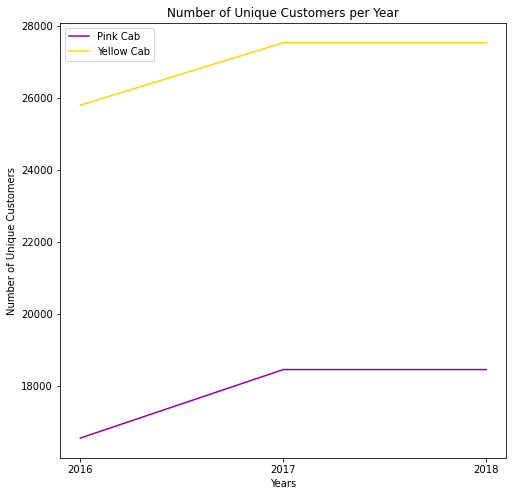

In [16]:
pink_users_2016 = pink[pink.Year == '2016']['Customer ID'].nunique()
pink_users_2017 = pink[pink.Year == '2017']['Customer ID'].nunique()
pink_users_2018 = pink[pink.Year == '2018']['Customer ID'].nunique()
pink_users = [pink_users_2016, pink_users_2018, pink_users_2018]

yellow_users_2016 = yellow[yellow.Year == '2016']['Customer ID'].nunique()
yellow_users_2017 = yellow[yellow.Year == '2017']['Customer ID'].nunique()
yellow_users_2018 = yellow[yellow.Year == '2018']['Customer ID'].nunique()
yellow_users = [yellow_users_2016, yellow_users_2018, yellow_users_2018]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()
sns.lineplot(x=years, y=pink_users, color=pink_c, label='Pink Cab')
sns.lineplot(x=years, y=yellow_users, color='gold', label='Yellow Cab')
plt.title('Number of Unique Customers per Year')
plt.xlabel('Years')
plt.ylabel('Number of Unique Customers')
ax.set_xticks(years)

plt.plot()

As with the ride numbers, the unique customers for both companies have a similar patter with **Yellow Cab** having a larger number.

### Rides per Month

Next we look at the number of rides per month for each company to see if there is any seasonality.

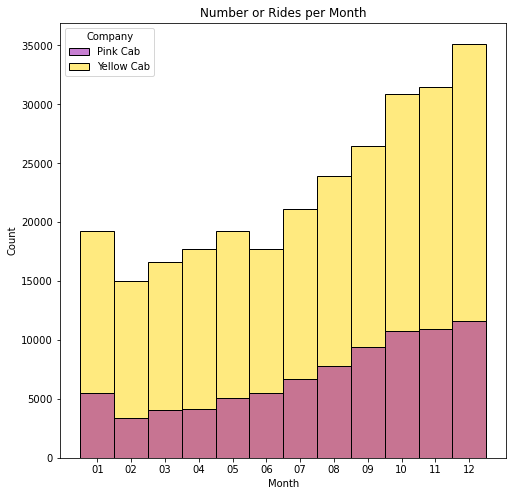

In [19]:
colors = [pink_c, 'gold']
custom_palette = sns.set_palette(sns.color_palette(colors))

fig = plt.figure(figsize=(8, 8))
sns.histplot(data=cab_merged, x='Month', hue='Company', palette=custom_palette)
plt.title('Number or Rides per Month')

plt.show()

This graph shows the following for both companies:

- There are a lower number of rides in the first 7 months of the year
- The number of rides rises with each month after July 
- The highest number of rides is in December

### Profit per Month

The last question we will look into is which month has the highest profit.

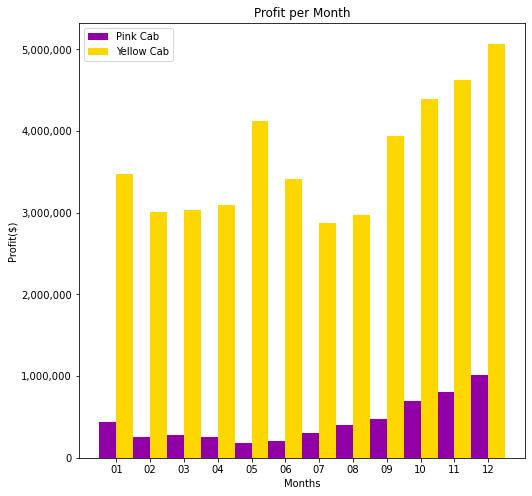

In [20]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
def profit_per_month(db):
    result = []
    for month in months:
        profits = db[db.Month == month].Profit.sum()
        result.append(profits)
    return result

n = len(months)
ind = np.arange(n)
width = 0.5

fig=plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(ind, profit_per_month(pink), width, label='Pink Cab')
plt.bar(ind + width, profit_per_month(yellow), width, label='Yellow Cab')
plt.xticks(ind + width / 2, months)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Profit per Month')
plt.ylabel('Profit($)')
plt.xlabel('Months')
plt.legend()

plt.show()

The graph shows us the following:

**Yellow Cab**
- Lower profits in Feb-Apr and July-Aug
- Highest profit in December

**Pink Cab**
- Lower profits from Feb - July
- Highest profits in December

## Conclusions

After analyzing the data we can now answer our questions.

**Questions to Answer**
- Which company has a higher profit?
    * **Yellow Cab** 
- Which company has a higher profit margin?
    * **Yellow Cab**
- Which company provides more rides each year?
    * **Yellow Cab**
- Which company has more unique customers?
    * **Yellow Cab**
- Which month do most rides occur per company?
    * December
- Which month creates the most profit per company?
    * December
    
### Which Company to Invest In?

**Yellow Cab** had better results in every area, so my suggestion would be to invest in them.